In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize

In [2]:
print(os.listdir("."))


['test_abstract.prism', 'test_obs.prism', 'num_robots_rando_reward_results', 'no_clock_numtasks_results', 'toy_mdp_1_robot_obs.prism', 'numtasks_results', '.git', 'ModelScript', 'num_tasks_rando_rewards_results', 'numrobots_results', 'no_clock_numrobot_results', '1R_2T_adv.tra', 'toy_mdp', 'no_clock.prism', '#toy_mdp_1_robot.prism#', 'partitioning_diagram.ipe', 'Graphs.ipynb', 'time_abstraction', 'toy_mdp_1_robot_props.prism', 'idle_dump.py', 'toy_mdp_1_robot.prism', 'toy_mdp.prism', 'decomposition.png', 'gridsize_results', '.ipynb_checkpoints']


Text(0.5, 0, 'Number of grid tiles')

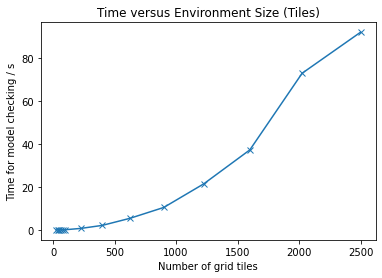

In [3]:
data = np.loadtxt("gridsize_results", delimiter=",")

plt.figure()
plt.plot(data[:,0]**2, data[:,1], marker = "x")
plt.title("Time versus Environment Size (Tiles)")
plt.ylabel("Time for model checking / s")
plt.xlabel("Number of grid tiles")

[2. 3. 4. 5. 6. 7. 8. 9.]
[4.70000e-02 2.11000e-01 1.86700e+00 4.09200e+00 1.30420e+01 2.13990e+01
 3.02570e+01 1.16696e+02]


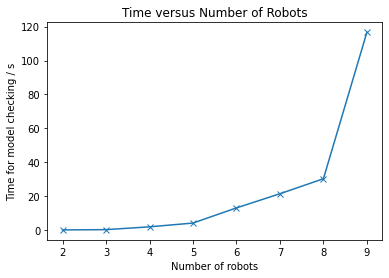

In [4]:
data = np.loadtxt("no_clock_numrobot_results", delimiter=" ")

plt.figure()
plt.plot(data[:,0], data[:,1], marker = "x")
plt.title("Time versus Number of Robots")
plt.ylabel("Time for model checking / s")
plt.xlabel("Number of robots")
print(data[:,0])
print(data[:,1])

[0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ]


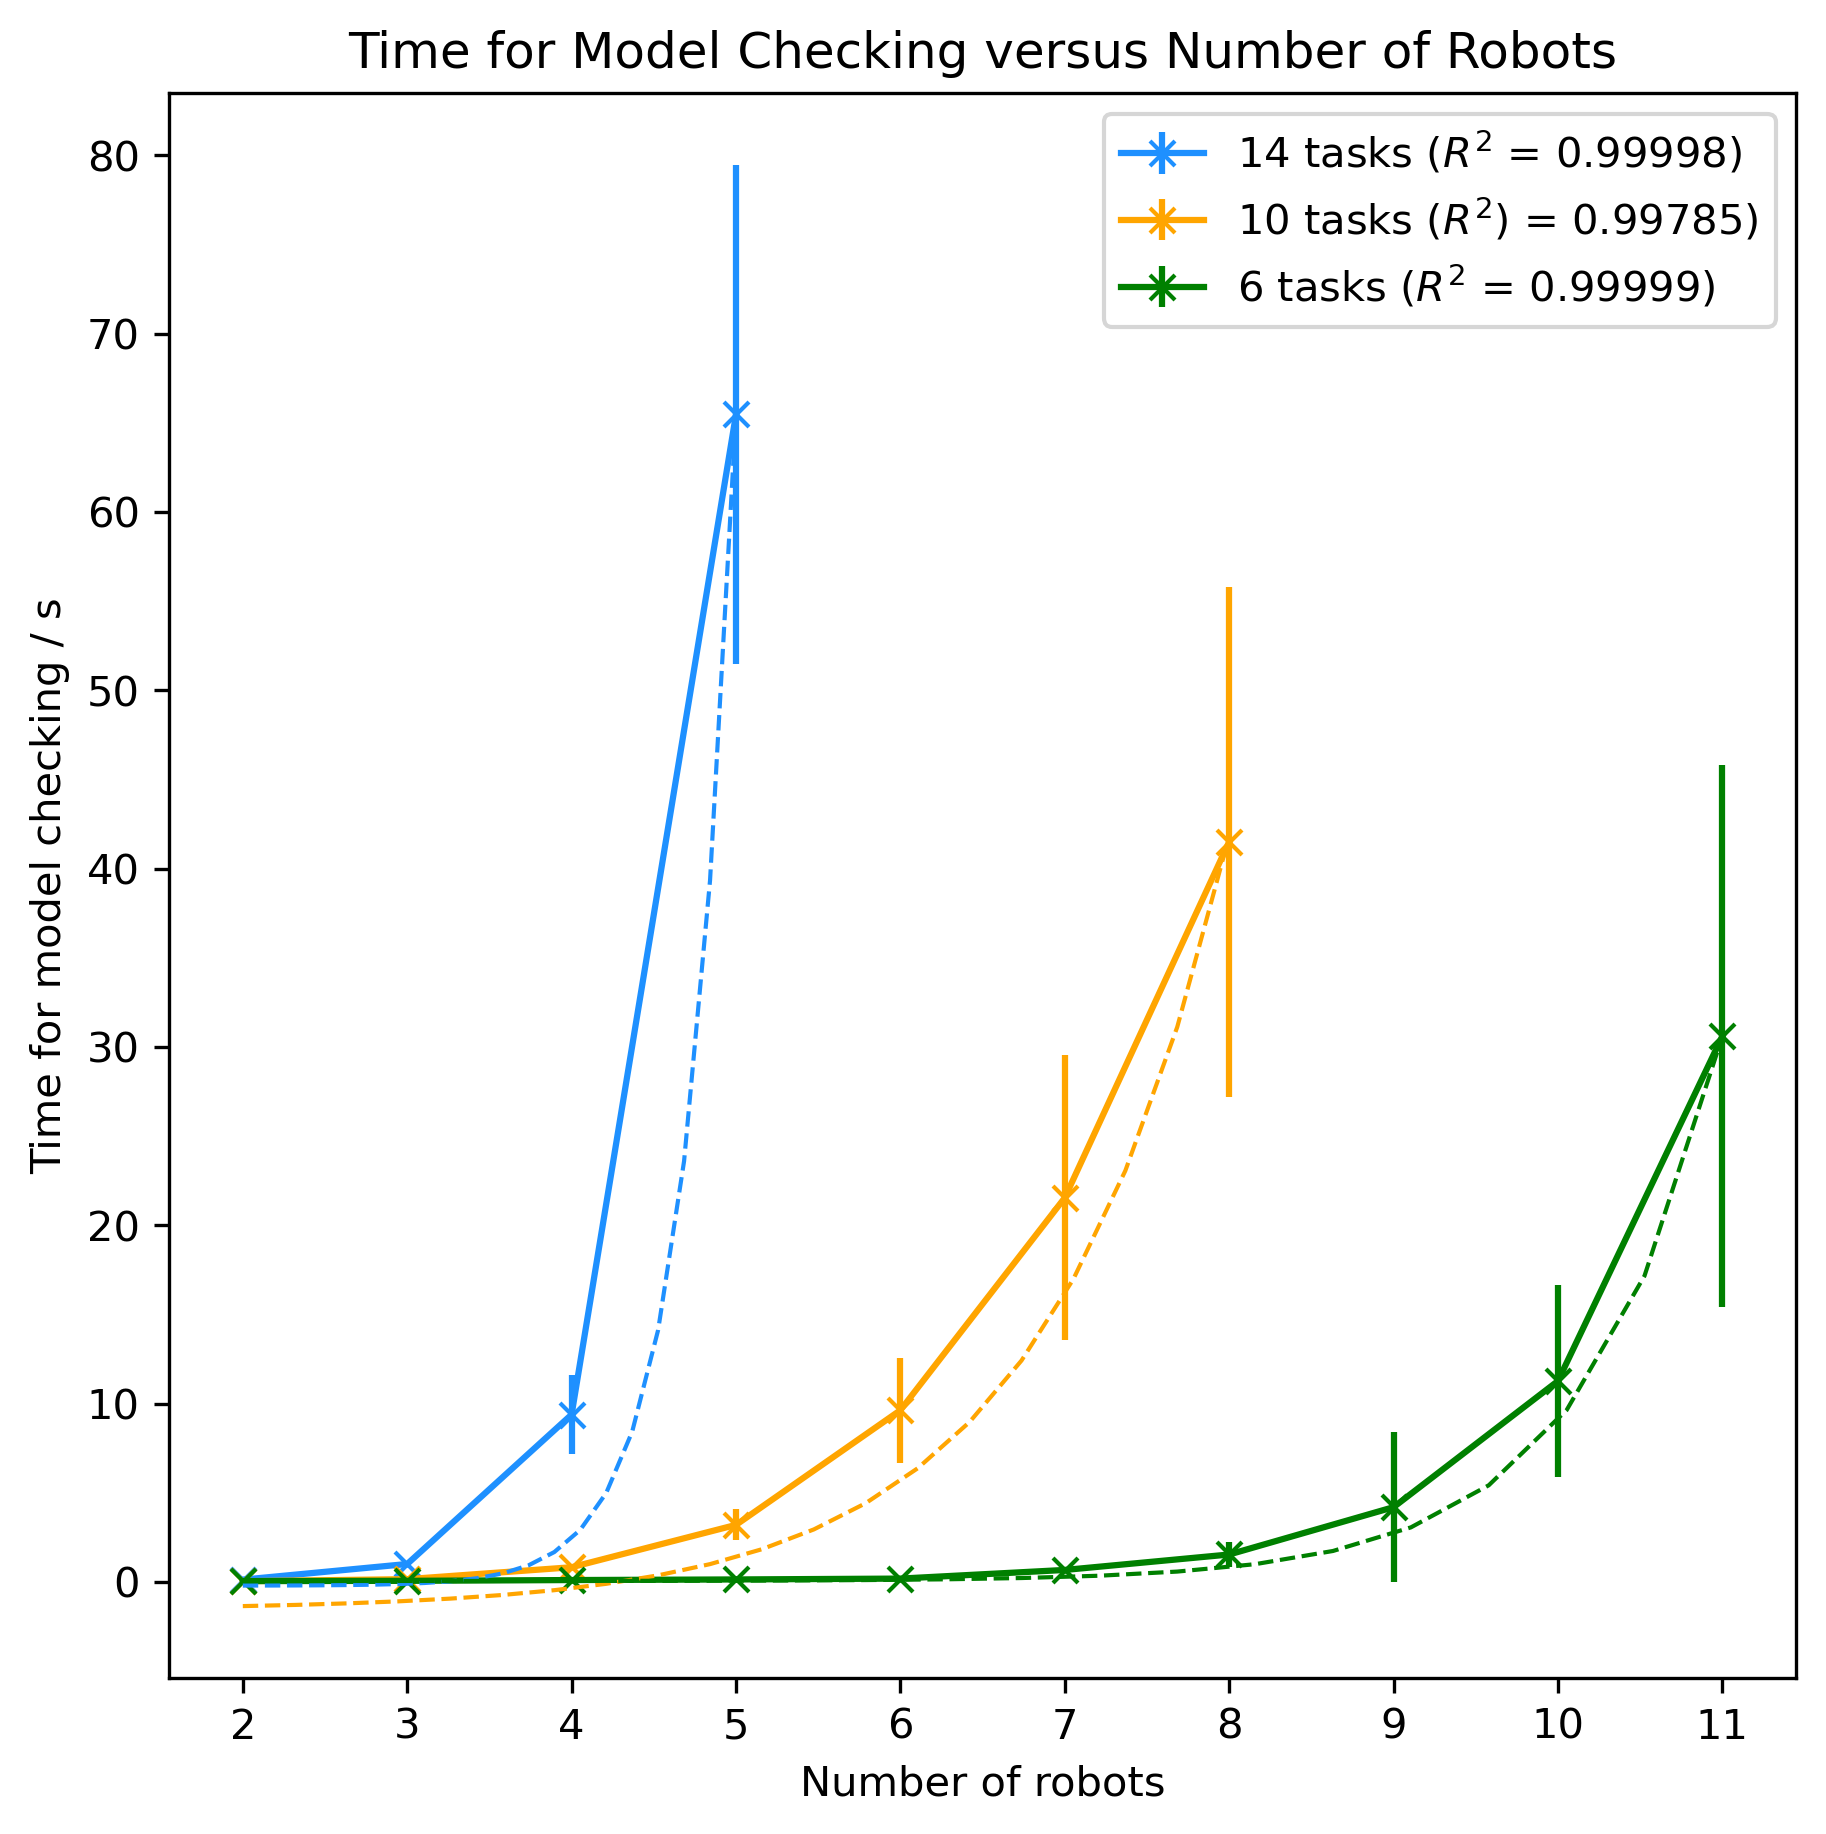

In [9]:
data = np.loadtxt("num_robots_rando_reward_results", delimiter=" ")

T10 = np.array([0,0,0])
T6 = np.array([0,0,0])
T14 = np.array([0,0,0])
for i in data:
    if i[0] == 10:
        T10 = np.vstack([T10, i[1:]])

    if i[0] == 6:
        T6 = np.vstack([T6, i[1:]])

    if i[0] == 14:
        T14 = np.vstack([T14, i[1:]])


p0 = (0.1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, T14[1:,0], T14[1:,1], p0)
A, B, C = params
expfits_T14 = exp(np.linspace(0,len(T14[1:,0])+1,20), A, B, C)
squaredDiffs = np.square(T14[1:,1] - exp(T14[1:,0], A, B, C))
squaredDiffsFromMean = np.square(T14[1:,1] - np.mean(T14[1:,1]))
Rsqr_T14 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

        
p0 = (0.1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, T10[1:,0], T10[1:,1], p0)
A, B, C = params
expfits_T10 = exp(np.linspace(0,len(T10[1:,0])+1,20), A, B, C)
squaredDiffs = np.square(T10[1:,1] - exp(T10[1:,0], A, B, C))
squaredDiffsFromMean = np.square(T10[1:,1] - np.mean(T10[1:,1]))
Rsqr_T10 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


p0 = (0.1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(exp, T6[1:,0], T6[1:,1], p0)
A, B, C = params
expfits_T6 = exp(np.linspace(0,len(T6[1:,0])+1,20), A, B, C)
squaredDiffs = np.square(T6[1:,1] - exp(T6[1:,0], A, B, C))
squaredDiffsFromMean = np.square(T6[1:,1] - np.mean(T6[1:,1]))
Rsqr_T6 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)





plt.figure(figsize = (7,7), dpi = 300)

plt.plot(np.linspace(2,len(T14[1:,0])+1,20), expfits_T14, ls = "--", zorder = 4, color = "dodgerblue", lw = 1)
plt.plot(np.linspace(2,len(T10[1:,0])+1,20), expfits_T10, ls = "--", zorder = 4, color = "orange", lw = 1)
plt.plot(np.linspace(2,len(T6[1:,0])+1,20), expfits_T6, ls = "--", zorder = 4, color = "g", lw = 1)

plt.errorbar(T14[1:,0], T14[1:,1], T14[1:,2], marker = "x", label = "14 tasks ($R^2$ = {:.5f})".format(Rsqr_T14), color = "dodgerblue")
plt.errorbar(T10[1:,0], T10[1:,1], T10[1:,2], marker = "x", label = "10 tasks ($R^2$) = {:.5f})".format(Rsqr_T10), color = "orange")
plt.errorbar(T6[1:,0], T6[1:,1], T6[1:,2], marker = "x", label = "6 tasks ($R^2$ = {:.5f})".format(Rsqr_T6), color = "g")

plt.legend()
plt.title("Time for Model Checking versus Number of Robots")
plt.ylabel("Time for model checking / s")
plt.xticks(range(2,12))
#plt.xlim(0,12)
plt.xlabel("Number of robots")
;

print(np.linspace(0,len(T14[1:,0])+1,20))

0.9747058564250589


''

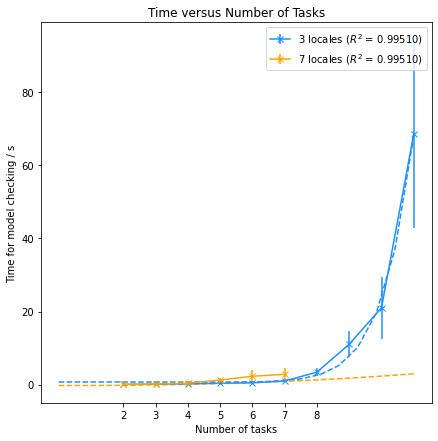

In [29]:
data = np.loadtxt("num_tasks_rando_rewards_results", delimiter=" ")

L3 = np.array([0,0,0])
L7 = np.array([0,0,0])

for i in data:
    if i[0] == 3:
        L3 = np.vstack([L3, i[1:]])
        
        
p0 = (1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(power_law, L3[1:,0], L3[1:,1], p0)
m,p,c = params
powerfits_L3 = power_law(np.linspace(0,len(L3[1:,0])+1,20), m,p,c)
squaredDiffs = np.square(L3[1:,1] - power_law(L3[1:,0], m,p,c))
squaredDiffsFromMean = np.square(L3[1:,1] - np.mean(L3[1:,1]))
Rsqr_L3 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)


for i in data:
    if i[0] == 7:
        L7 = np.vstack([L7, i[1:]])
        
        
p0 = (1, 1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(power_law, L7[1:,0], L7[1:,1], p0)
m,p,c = params
powerfits_L7 = power_law(np.linspace(0,len(L7[1:,0])+1,20), m,p,c)
squaredDiffs = np.square(L7[1:,1] - power_law(L7[1:,0], m,p,c))
squaredDiffsFromMean = np.square(L7[1:,1] - np.mean(L7[1:,1]))
Rsqr_L7 = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

print(Rsqr_L7)


plt.figure(figsize = (7,7))
plt.plot(np.linspace(0,len(L3[1:,0])+1,20), powerfits_L3, color = "dodgerblue", ls = "--")
plt.plot(np.linspace(0,len(L3[1:,0])+1,20), powerfits_L7, color = "orange", ls = "--")
plt.errorbar(L3[1:,0], L3[1:,1], L3[1:,2], marker = "x", label = "3 locales ($R^2$ = {:.5f})".format(Rsqr_L3), color = "dodgerblue")
plt.errorbar(L7[1:,0], L7[1:,1], L7[1:,2], marker = "x", label = "7 locales ($R^2$ = {:.5f})".format(Rsqr_L3), color = "orange")
#plt.errorbar(T6[1:,0], T6[1:,1], T6[1:,2], marker = "x", label = "6 tasks")
plt.legend()
plt.title("Time versus Number of Tasks")
plt.ylabel("Time for model checking / s")
plt.xticks(range(2,9))
plt.xlabel("Number of tasks")
;

In [7]:
def exp(x_vals, A=1, B=1, C=0):
    
    r = []
    
    for x in x_vals:
        r.append(A * np.exp(B*x) + C)
    
    return np.array(r)

In [11]:
def power_law(x_vals, m, p, c):
    
    r = []
    
    for x in x_vals:
        r.append(m*x**p + c)
        
    return np.array(r)